<a href="https://colab.research.google.com/github/Glen-Maki/keiba-xgboost/blob/main/keiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/eml/keiba/campionscup.csv', encoding="Shift-JIS")
df_all.head()

,年,月,日,回次,場所,日次,レース番号,レース名,クラスコード,芝・ダ,...,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,前走馬印1,前走レース印1,前走PCI
0,22,10,2,5,中京,9,7,１勝ｸﾗｽ,23,ダ,...,NaN,NaN,NaN,NaN,NaN,NaN,5.8,,,49.0
1,22,10,2,5,中京,9,7,１勝ｸﾗｽ,23,ダ,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,,,0.0
2,22,10,2,5,中京,9,7,１勝ｸﾗｽ,23,ダ,...,NaN,NaN,NaN,NaN,NaN,NaN,2.6,,,49.7
3,22,10,2,5,中京,9,7,１勝ｸﾗｽ,23,ダ,...,NaN,NaN,NaN,NaN,NaN,NaN,9.8,,,52.8
4,22,10,2,5,中京,9,7,１勝ｸﾗｽ,23,ダ,...,NaN,NaN,NaN,NaN,NaN,NaN,31.8,,,41.3


In [ ]:
print(list(df_all.columns.values))

['年', '月', '日', '回次', '場所', '日次', 'レース番号', 'レース名', 'クラスコード', '芝・ダ', 'コースコード', '距離', '馬場状態', '馬名', '性別', '年齢', '騎手名', '斤量', '頭数', '馬番', '確定着順', '入線着順', '異常コード', '着差タイム', '人気順', '走破タイム', '走破時計', 'Unnamed: 27', '通過順1', '通過順2', '通過順3', '通過順4', '上がり3Fタイム', '馬体重', '調教師', '所属地', '賞金', '血統登録番号', '騎手コード', '調教師コード', 'レースID', '現馬主名', '生産者名', '父馬名', '母馬名', '母の父馬名', '毛色', '生年月日', '単勝オッズ', '馬印1', 'レース印1', 'PCI', '間隔', '前走年', '前走月', '前走日', '前走回次', '前走場所', '前走日次', '前走レース番号', '前走レース名', '前走クラスコード', '前走芝・ダ', '前走コースコード', '前走距離', '前走馬場状態', 'Unnamed: 66', '前走性別', 'Unnamed: 68', '前走騎手名', '前走斤量', '前走頭数', '前走馬番', '前走確定着順', '前走入線着順', '前走異常コード', '前走着差タイム', '前走人気順', '前走走破タイム', '前走走破時計', 'Unnamed: 80', '前走通過順1', '前走通過順2', '前走通過順3', '前走通過順4', '前走上がり3Fタイム', '前走馬体重', 'Unnamed: 87', 'Unnamed: 88', '前走賞金', 'Unnamed: 90', '前走騎手コード', 'Unnamed: 92', '前走競走識別コード', 'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101', '前走馬印1', '前走レース印1', '前走PCI']


In [ ]:
df = df_all[['性別', '年齢', '騎手名', '斤量','馬番','異常コード','馬体重',
           '前走芝・ダ', '前走距離','前走騎手名', '前走斤量',
           '前走入線着順', '前走異常コード','前走通過順1', '前走通過順2',
            '前走通過順3', '前走通過順4','前走上がり3Fタイム', '前走馬体重','入線着順']] 

In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,性別,年齢,騎手名,斤量,馬番,異常コード,馬体重,前走芝・ダ,前走距離,前走騎手名,前走斤量,前走入線着順,前走異常コード,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,入線着順
0,セ,3,小牧太,55.0,2,0,500,ダ,1700,小牧太,56.0,1,0,2,2,2,2,37.4,490,1
1,牡,3,和田竜二,55.0,4,0,498,ダ,1500,今村聖奈,52.0,1,0,4,4,3,1,0.0,492,2
2,牡,4,藤懸貴志,57.0,6,0,472,ダ,1700,藤岡佑介,54.0,2,0,12,12,7,8,37.7,474,3
3,牡,3,松若風馬,55.0,7,0,452,芝,2000,浜中俊,54.0,11,0,7,8,4,6,36.6,462,4
4,牡,4,小沢大仁,56.0,8,0,500,ダ,1800,角田大河,54.0,7,0,7,7,9,8,40.4,504,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   性別          5355 non-null   object 
 1   年齢          5355 non-null   int64  
 2   騎手名         5355 non-null   object 
 3   斤量          5355 non-null   float64
 4   馬番          5355 non-null   int64  
 5   異常コード       5355 non-null   int64  
 6   馬体重         5355 non-null   int64  
 7   前走芝・ダ       5355 non-null   object 
 8   前走距離        5355 non-null   int64  
 9   前走騎手名       5355 non-null   object 
 10  前走斤量        5355 non-null   float64
 11  前走入線着順      5355 non-null   int64  
 12  前走異常コード     5355 non-null   int64  
 13  前走通過順1      5355 non-null   int64  
 14  前走通過順2      5355 non-null   int64  
 15  前走通過順3      5355 non-null   int64  
 16  前走通過順4      5355 non-null   int64  
 17  前走上がり3Fタイム  5355 non-null   float64
 18  前走馬体重       5355 non-null   int64  
 19  入線着順        5355 non-null  

None

,年齢,斤量,馬番,異常コード,馬体重,前走距離,前走斤量,前走入線着順,前走異常コード,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,入線着順
count,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000,5355.000000
mean,4.383380,55.092344,7.563772,0.014939,482.207283,1766.229692,55.161251,7.059010,0.018114,5.829318,5.901587,6.999440,6.863119,35.784351,481.038655,7.489636
std,1.156418,1.748316,4.265186,0.244019,28.170295,216.451489,1.729029,4.287775,0.252460,4.624366,4.603906,4.260104,4.228721,9.227076,33.728228,4.259560
min,3.000000,49.000000,1.000000,0.000000,384.000000,1000.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,54.000000,4.000000,0.000000,462.000000,1700.000000,54.000000,3.000000,0.000000,2.000000,2.000000,3.000000,3.000000,37.000000,462.000000,4.000000
50%,4.000000,55.000000,7.000000,0.000000,482.000000,1800.000000,55.000000,7.000000,0.000000,5.000000,5.000000,7.000000,6.000000,37.900000,481.000000,7.000000
75%,5.000000,57.000000,11.000000,0.000000,502.000000,1800.000000,57.000000,10.000000,0.000000,9.000000,9.000000,10.000000,10.000000,38.900000,502.000000,11.000000
max,10.000000,60.000000,16.000000,4.000000,592.000000,3570.000000,62.000000,18.000000,4.000000,18.000000,18.000000,18.000000,18.000000,48.800000,584.000000,16.000000


In [ ]:
drop_index = df.index[(df['異常コード'] != 0) | (df['前走異常コード'] != 0 )]
# print(drop_index)
df = df.drop(drop_index)

display(df.describe())

,年齢,斤量,馬番,異常コード,馬体重,前走距離,前走斤量,前走入線着順,前走異常コード,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,入線着順
count,5304.000000,5304.000000,5304.000000,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000
mean,4.380279,55.090592,7.560709,0.0,482.179864,1766.178356,55.161482,7.098982,0.0,5.854072,5.925528,7.030732,6.898944,35.981655,481.582956,7.514706
std,1.156276,1.749934,4.265789,0.0,28.199849,216.819986,1.729160,4.266023,0.0,4.615502,4.593151,4.238816,4.208632,8.852890,29.697645,4.242126
min,3.000000,49.000000,1.000000,0.0,384.000000,1000.000000,49.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,54.000000,4.000000,0.0,462.000000,1700.000000,54.000000,3.000000,0.0,2.000000,2.000000,3.000000,3.000000,37.000000,462.000000,4.000000
50%,4.000000,55.000000,7.000000,0.0,482.000000,1800.000000,55.000000,7.000000,0.0,5.000000,5.000000,7.000000,6.000000,38.000000,481.000000,7.000000
75%,5.000000,57.000000,11.000000,0.0,502.000000,1800.000000,57.000000,10.000000,0.0,9.000000,9.000000,10.000000,10.000000,38.900000,502.000000,11.000000
max,10.000000,60.000000,16.000000,0.0,592.000000,3570.000000,62.000000,18.000000,0.0,18.000000,18.000000,18.000000,18.000000,48.800000,584.000000,16.000000


In [ ]:
df.loc[df['前走馬体重'] == 0,'前走馬体重'] =df.loc[df['前走馬体重'] == 0,'馬体重']

for element in ['前走上がり3Fタイム','前走通過順1', '前走通過順2','前走通過順3', '前走通過順4']:
  df.loc[df[element] == 0,element] = np.NaN

# 性別のone-hot
one_hot_vector = pd.get_dummies(df[['性別']],drop_first=False)
df = pd.concat([df, one_hot_vector], axis=1)

# 性別のone-hot
one_hot_vector = pd.get_dummies(df[['前走芝・ダ']],drop_first=False)
df = pd.concat([df, one_hot_vector], axis=1)

# 乗り替わり
def categorize(x):
  if x['騎手名'] == x['前走騎手名']:
    return 0
  else:
    return 1

df['乗り替わり'] = df.apply(categorize, axis=1)

display(df.head())
display(df.describe())

,性別,年齢,騎手名,斤量,馬番,異常コード,馬体重,前走芝・ダ,前走距離,前走騎手名,...,前走通過順4,前走上がり3Fタイム,前走馬体重,入線着順,性別_セ,性別_牝,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝,乗り替わり
0,セ,3,小牧太,55.0,2,0,500,ダ,1700,小牧太,...,2.0,37.4,490,1,1,0,0,1,0,0
1,牡,3,和田竜二,55.0,4,0,498,ダ,1500,今村聖奈,...,1.0,NaN,492,2,0,0,1,1,0,1
2,牡,4,藤懸貴志,57.0,6,0,472,ダ,1700,藤岡佑介,...,8.0,37.7,474,3,0,0,1,1,0,1
3,牡,3,松若風馬,55.0,7,0,452,芝,2000,浜中俊,...,6.0,36.6,462,4,0,0,1,0,1,1
4,牡,4,小沢大仁,56.0,8,0,500,ダ,1800,角田大河,...,8.0,40.4,504,5,0,0,1,1,0,1


,年齢,斤量,馬番,異常コード,馬体重,前走距離,前走斤量,前走入線着順,前走異常コード,前走通過順1,...,前走通過順4,前走上がり3Fタイム,前走馬体重,入線着順,性別_セ,性別_牝,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝,乗り替わり
count,5304.000000,5304.000000,5304.000000,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.0,4441.000000,...,5300.000000,5019.000000,5304.000000,5304.000000,5304.000000,5304.00000,5304.000000,5304.000000,5304.000000,5304.000000
mean,4.380279,55.090592,7.560709,0.0,482.179864,1766.178356,55.161482,7.098982,0.0,6.991669,...,6.904151,38.024846,481.771870,7.514706,0.064668,0.33767,0.597662,0.917232,0.082768,0.664593
std,1.156276,1.749934,4.265789,0.0,28.199849,216.819986,1.729160,4.266023,0.0,4.181865,...,4.205948,2.262181,28.188611,4.242126,0.245963,0.47296,0.490416,0.275557,0.275557,0.472177
min,3.000000,49.000000,1.000000,0.0,384.000000,1000.000000,49.000000,1.000000,0.0,1.000000,...,1.000000,13.200000,380.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,54.000000,4.000000,0.0,462.000000,1700.000000,54.000000,3.000000,0.0,3.000000,...,3.000000,37.200000,462.000000,4.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,55.000000,7.000000,0.0,482.000000,1800.000000,55.000000,7.000000,0.0,7.000000,...,6.000000,38.000000,481.000000,7.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000
75%,5.000000,57.000000,11.000000,0.0,502.000000,1800.000000,57.000000,10.000000,0.0,10.000000,...,10.000000,39.000000,502.000000,11.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000
max,10.000000,60.000000,16.000000,0.0,592.000000,3570.000000,62.000000,18.000000,0.0,18.000000,...,18.000000,48.800000,584.000000,16.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.sample(frac=0.5, random_state=0).reset_index(drop=True)

In [ ]:
y_data = df.loc[:,['入線着順']]
x_data = df.loc[:,~df.columns.isin(['入線着順','騎手名','前走騎手名','異常コード','前走異常コード','前走芝・ダ','性別'])]
display(y_data.head())
display(x_data.head())

,入線着順
0,16
1,3
2,4
3,3
4,13


,年齢,斤量,馬番,馬体重,前走距離,前走斤量,前走入線着順,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,性別_セ,性別_牝,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝,乗り替わり
0,3,55.0,5,474,1700,54.0,13,2.0,3.0,5.0,12.0,41.0,470,0,0,1,1,0,1
1,3,54.0,8,488,1700,54.0,1,1.0,1.0,1.0,1.0,37.6,500,0,0,1,1,0,0
2,4,55.0,1,478,1800,57.0,1,13.0,13.0,10.0,5.0,37.3,480,1,0,0,1,0,0
3,4,57.0,14,488,1800,57.0,2,2.0,2.0,2.0,2.0,38.9,492,0,0,1,1,0,0
4,4,55.0,1,460,1400,55.0,12,NaN,NaN,13.0,13.0,37.8,468,0,1,0,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.8)

print(x_train)
print(y_train)

      年齢    斤量  馬番  馬体重  前走距離  前走斤量  前走入線着順  前走通過順1  前走通過順2  前走通過順3  前走通過順4  \
2152   3  52.0   9  396  1700  51.0       2    13.0    13.0    12.0    13.0   
2510   4  53.0   2  442  1900  56.0      15     4.0     5.0     5.0     6.0   
972    4  57.0   6  506  1400  57.0       1     3.0     3.0     1.0     1.0   
375    4  57.0   9  478  1700  57.0       2     1.0     1.0     1.0     1.0   
423    4  55.0   9  452  1500  54.0       5     6.0     6.0     4.0     3.0   
...   ..   ...  ..  ...   ...   ...     ...     ...     ...     ...     ...   
467    4  55.0   8  478  1800  55.0      12     1.0     1.0     1.0     1.0   
1821   4  57.0  12  480  1800  56.0       5    15.0    15.0    10.0     5.0   
308    4  57.0  16  522  1400  57.0      12     NaN     NaN     4.0     5.0   
1897   4  54.0   5  476  1800  56.0      14     2.0     2.0     7.0    13.0   
1418   6  55.0   8  496  1400  55.0      10     NaN     NaN    12.0    12.0   

      前走上がり3Fタイム  前走馬体重  性別_セ  性別_牝  性別_牡  前走芝・ダ_ダ 

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

import xgboost as xgb
model = xgb.XGBClassifier()

from sklearn.model_selection import GridSearchCV

params = {'booster': ['gbtree'], 'n_estimators': [10, 30, 50],'max_depth': [3,5,7], 
  'learning_rate': [0.3, 0.5, 0.7], 'colsample_bytree': [0.3, 0.5, 0.7],'random_state': [0],
  "objective":["multi:softmax"],"num_class": [16]
}


In [ ]:
gs = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring = 'f1_micro')
gs.fit(x_train, y_train)

print('best score: {:0.3f}'.format(gs.score(x_test, y_test)))
print('best params: {}'.format(gs.best_params_))
print('best val score:  {:0.3f}'.format(gs.best_score_))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

best score: 0.090
best params: {'booster': 'gbtree', 'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'num_class': 16, 'objective': 'multi:softmax', 'random_state': 0}
best val score:  0.102


In [ ]:
model=xgb.XGBClassifier(booster= 'gbtree', colsample_bytree= 0.5, learning_rate= 0.25, 
                        max_depth=  3, n_estimators= 50, num_class= 16, 
                        objective='multi:softmax', random_state= 0)

model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(colsample_bytree=0.5, learning_rate=0.25, n_estimators=50,
              num_class=16, objective='multi:softprob')

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.12      0.22      0.16        41
           2       0.13      0.10      0.11        52
           3       0.15      0.12      0.13        48
           4       0.11      0.12      0.12        41
           5       0.04      0.10      0.06        20
           6       0.03      0.03      0.03        39
           7       0.02      0.02      0.02        46
           8       0.03      0.03      0.03        36
           9       0.23      0.13      0.17        38
          10       0.13      0.11      0.12        38
          11       0.09      0.12      0.10        32
          12       0.00      0.00      0.00        22
          13       0.07      0.05      0.05        22
          14       0.09      0.04      0.05        27
          15       0.07      0.06      0.06        16
          16       0.18      0.15      0.17        13

    accuracy                           0.09       531
   macro avg       0.09   

Text(0, 0.5, '前走入線着順')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_

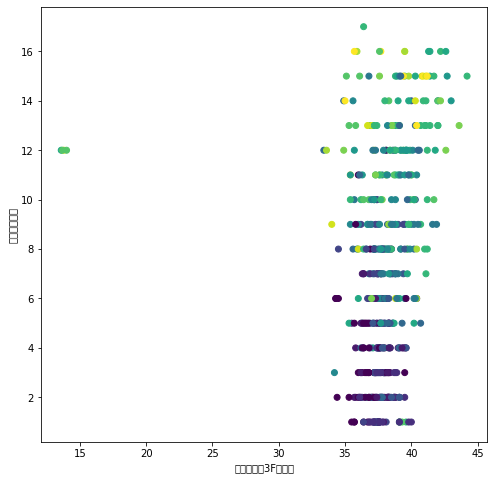

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(x_test['前走上がり3Fタイム'], x_test['前走入線着順'], c=y_test_pred)
plt.xlabel('前走上がり3Fタイム')
plt.ylabel('前走入線着順')


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


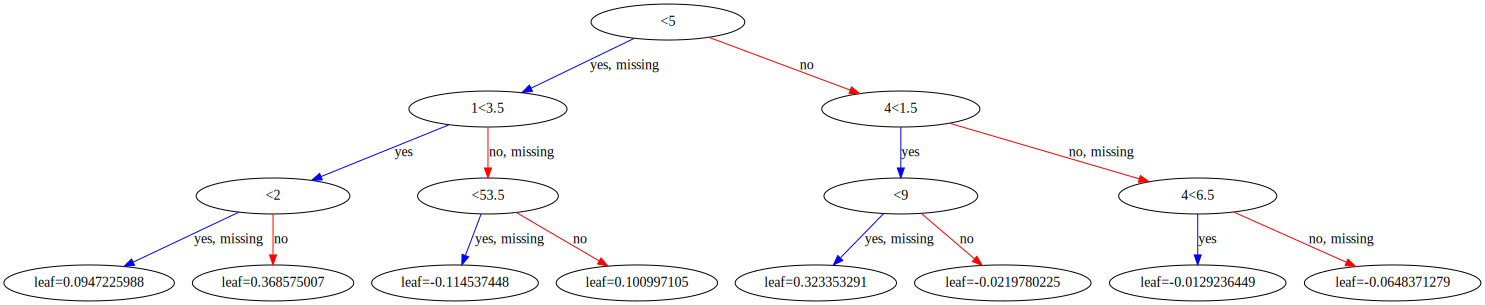

In [ ]:
xgb.to_graphviz(model, num_trees=0)


In [ ]:
import pickle    # 保存
file_path = '/content/drive/MyDrive/eml/keiba/champions_cup.pkl'

pickle.dump(model, open(file_path, 'wb'))

In [ ]:
racecards = pd.read_csv('/content/drive/MyDrive/eml/keiba/test.csv', encoding="Shift-JIS")
racecards.head()

,枠番,B,番,馬名S,Ｃ,性別,年齢,斤量,減M,馬体重,...,馬場状態,B.1,斤量.1,減,着順,通過順1,2,3,4,上り3F
0,1,B,1,グロリアムンディ,NaN,牡,4,57,NaN,504,...,良,B,58.0,NaN,12,14.0,14.0,13,13,37.1
1,1,B,2,サンライズホープ,NaN,牡,5,57,NaN,540,...,良,B,56.0,NaN,1,12.0,12.0,11,8,36.5
2,2,NaN,3,ハピ,NaN,牡,3,56,NaN,466,...,良,NaN,54.0,NaN,4,7.0,6.0,9,10,36.8
3,2,NaN,4,スマッシングハーツ,NaN,牡,6,57,NaN,522,...,良,NaN,56.0,NaN,4,NaN,NaN,15,14,34.8
4,3,NaN,5,ジュンライトボルト,NaN,牡,5,57,NaN,486,...,良,NaN,56.0,NaN,1,7.0,7.0,7,7,37.6


In [ ]:
print(list(racecards.columns.values))

['枠番', 'B', '番', '馬名S', 'Ｃ', '性別', '年齢', '斤量', '減M', '馬体重', '増減', '替', '騎手', '馬番', '体重', '芝・ダ', '距離', '馬場状態', 'B.1', '斤量.1', '減', '着順', '通過順1', '2', '3', '4', '上り3F']


In [ ]:
racecards = racecards[['性別', '年齢', '斤量','馬番','馬体重','芝・ダ',
                   '距離','替', '斤量.1','着順','通過順1', '2', '3', 
                   '4','上り3F', '体重','馬名S']] 
racecards.head()

,性別,年齢,斤量,馬番,馬体重,芝・ダ,距離,替,斤量.1,着順,通過順1,2,3,4,上り3F,体重,馬名S
0,牡,4,57,16,504,芝,2200,*,58.0,12,14.0,14.0,13,13,37.1,496,グロリアムンディ
1,牡,5,57,14,540,ダ,1800,NaN,56.0,1,12.0,12.0,11,8,36.5,538,サンライズホープ
2,牡,3,56,8,466,ダ,1800,NaN,54.0,4,7.0,6.0,9,10,36.8,466,ハピ
3,牡,6,57,12,522,ダ,1600,NaN,56.0,4,NaN,NaN,15,14,34.8,510,スマッシングハーツ
4,牡,5,57,9,486,ダ,1900,NaN,56.0,1,7.0,7.0,7,7,37.6,478,ジュンライトボルト


In [ ]:
# カラム名を合わせる
racecards = racecards.rename(columns={'替': '乗り替わり', '体重':'前走馬体重', '斤量.1':'前走斤量', '芝・ダ':'前走芝・ダ',
                        '距離':'前走距離', '着順':'前走入線着順','上り3F':'前走上がり3Fタイム',
                        '通過順1':'前走通過順1', '2':'前走通過順2', '3':'前走通過順3', '4':'前走通過順4'
                        })
racecards.head()

,性別,年齢,斤量,馬番,馬体重,前走芝・ダ,前走距離,乗り替わり,前走斤量,前走入線着順,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,馬名S
0,牡,4,57,16,504,芝,2200,*,58.0,12,14.0,14.0,13,13,37.1,496,グロリアムンディ
1,牡,5,57,14,540,ダ,1800,NaN,56.0,1,12.0,12.0,11,8,36.5,538,サンライズホープ
2,牡,3,56,8,466,ダ,1800,NaN,54.0,4,7.0,6.0,9,10,36.8,466,ハピ
3,牡,6,57,12,522,ダ,1600,NaN,56.0,4,NaN,NaN,15,14,34.8,510,スマッシングハーツ
4,牡,5,57,9,486,ダ,1900,NaN,56.0,1,7.0,7.0,7,7,37.6,478,ジュンライトボルト


In [ ]:
racecards.loc[racecards['前走馬体重'] == 0,'前走馬体重'] =racecards.loc[racecards['前走馬体重'] == 0,'馬体重']

for element in ['前走上がり3Fタイム','前走通過順1', '前走通過順2','前走通過順3', '前走通過順4']:
  racecards.loc[racecards[element] == 0,element] = np.NaN
  racecards.loc[racecards[element] == "----",element] = np.NaN

# 性別のone-hot
one_hot_vector = pd.get_dummies(racecards[['性別']],drop_first=False)
racecards = pd.concat([racecards, one_hot_vector], axis=1)

# 性別のone-hot
one_hot_vector = pd.get_dummies(racecards[['前走芝・ダ']],drop_first=False)
racecards = pd.concat([racecards, one_hot_vector], axis=1)

# 乗り替わり
def categorize(x):
  if x['乗り替わり'] == "*":
    return 1
  else:
    return 0

racecards['乗り替わり'] = racecards.apply(categorize, axis=1)

display(racecards.head())
display(racecards.describe())

,性別,年齢,斤量,馬番,馬体重,前走芝・ダ,前走距離,乗り替わり,前走斤量,前走入線着順,...,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,馬名S,性別_セ,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝
0,牡,4,57,16,504,芝,2200,1,58.0,12,...,14.0,13.0,13.0,37.1,496,グロリアムンディ,0,1,0,1
1,牡,5,57,14,540,ダ,1800,0,56.0,1,...,12.0,11.0,8.0,36.5,538,サンライズホープ,0,1,1,0
2,牡,3,56,8,466,ダ,1800,0,54.0,4,...,6.0,9.0,10.0,36.8,466,ハピ,0,1,1,0
3,牡,6,57,12,522,ダ,1600,0,56.0,4,...,NaN,15.0,14.0,34.8,510,スマッシングハーツ,0,1,1,0
4,牡,5,57,9,486,ダ,1900,0,56.0,1,...,7.0,7.0,7.0,37.6,478,ジュンライトボルト,0,1,1,0


,年齢,斤量,馬番,馬体重,前走距離,乗り替わり,前走斤量,前走入線着順,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走馬体重,性別_セ,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,11.000000,12.000000,16.000000,16.000000,16.000000,16.0000,16.0000,16.000000,16.000000
mean,4.937500,56.812500,9.125000,505.750000,1856.250000,0.500000,56.312500,6.187500,7.272727,7.500000,8.562500,8.125000,504.500000,0.0625,0.9375,0.875000,0.125000
std,1.526161,0.403113,4.814907,20.091458,189.626827,0.516398,1.195478,4.534589,4.474168,4.502525,4.774498,4.883646,21.140798,0.2500,0.2500,0.341565,0.341565
min,3.000000,56.000000,1.000000,466.000000,1600.000000,0.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,466.000000,0.0000,0.0000,0.000000,0.000000
25%,4.000000,57.000000,4.750000,492.000000,1750.000000,0.000000,55.750000,2.750000,3.500000,3.750000,4.750000,3.750000,493.000000,0.0000,1.0000,1.000000,0.000000
50%,5.000000,57.000000,10.000000,507.000000,1850.000000,0.500000,56.000000,5.500000,7.000000,7.000000,8.500000,8.500000,503.500000,0.0000,1.0000,1.000000,0.000000
75%,6.000000,57.000000,12.250000,520.000000,2000.000000,1.000000,57.000000,9.000000,10.500000,12.000000,13.000000,12.250000,520.000000,0.0000,1.0000,1.000000,0.000000
max,8.000000,57.000000,16.000000,540.000000,2200.000000,1.000000,58.000000,15.000000,14.000000,14.000000,16.000000,16.000000,538.000000,1.0000,1.0000,1.000000,1.000000


In [ ]:
racecards['前走上がり3Fタイム'] = racecards['前走上がり3Fタイム'].astype(float)
display(racecards.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   性別          16 non-null     object 
 1   年齢          16 non-null     int64  
 2   斤量          16 non-null     int64  
 3   馬番          16 non-null     int64  
 4   馬体重         16 non-null     int64  
 5   前走芝・ダ       16 non-null     object 
 6   前走距離        16 non-null     int64  
 7   乗り替わり       16 non-null     int64  
 8   前走斤量        16 non-null     float64
 9   前走入線着順      16 non-null     int64  
 10  前走通過順1      11 non-null     float64
 11  前走通過順2      12 non-null     float64
 12  前走通過順3      16 non-null     float64
 13  前走通過順4      16 non-null     float64
 14  前走上がり3Fタイム  11 non-null     float64
 15  前走馬体重       16 non-null     int64  
 16  馬名S         16 non-null     object 
 17  性別_セ        16 non-null     uint8  
 18  性別_牡        16 non-null     uint8  
 19  前走芝・ダ_ダ     16 non-null     uin

None

In [ ]:
# 牝馬いないので
racecards['性別_牝'] = 0
test_data = racecards.loc[:,['年齢', '斤量', '馬番', '馬体重', '前走距離', '前走斤量', '前走入線着順', '前走通過順1',
                           '前走通過順2', '前走通過順3', '前走通過順4', '前走上がり3Fタイム', '前走馬体重', 
                           '性別_セ', '性別_牝', '性別_牡', '前走芝・ダ_ダ', '前走芝・ダ_芝', '乗り替わり']]
display(test_data.head())

display(test_data.info())

,年齢,斤量,馬番,馬体重,前走距離,前走斤量,前走入線着順,前走通過順1,前走通過順2,前走通過順3,前走通過順4,前走上がり3Fタイム,前走馬体重,性別_セ,性別_牝,性別_牡,前走芝・ダ_ダ,前走芝・ダ_芝,乗り替わり
0,4,57,16,504,2200,58.0,12,14.0,14.0,13.0,13.0,37.1,496,0,0,1,0,1,1
1,5,57,14,540,1800,56.0,1,12.0,12.0,11.0,8.0,36.5,538,0,0,1,1,0,0
2,3,56,8,466,1800,54.0,4,7.0,6.0,9.0,10.0,36.8,466,0,0,1,1,0,0
3,6,57,12,522,1600,56.0,4,NaN,NaN,15.0,14.0,34.8,510,0,0,1,1,0,0
4,5,57,9,486,1900,56.0,1,7.0,7.0,7.0,7.0,37.6,478,0,0,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   年齢          16 non-null     int64  
 1   斤量          16 non-null     int64  
 2   馬番          16 non-null     int64  
 3   馬体重         16 non-null     int64  
 4   前走距離        16 non-null     int64  
 5   前走斤量        16 non-null     float64
 6   前走入線着順      16 non-null     int64  
 7   前走通過順1      11 non-null     float64
 8   前走通過順2      12 non-null     float64
 9   前走通過順3      16 non-null     float64
 10  前走通過順4      16 non-null     float64
 11  前走上がり3Fタイム  11 non-null     float64
 12  前走馬体重       16 non-null     int64  
 13  性別_セ        16 non-null     uint8  
 14  性別_牝        16 non-null     int64  
 15  性別_牡        16 non-null     uint8  
 16  前走芝・ダ_ダ     16 non-null     uint8  
 17  前走芝・ダ_芝     16 non-null     uint8  
 18  乗り替わり       16 non-null     int64  
dtypes: float64(6), int64(9), uint8(

None

In [ ]:
test_pred = model.predict(test_data)
pred_df = pd.Series(test_pred, index=racecards['馬名S'])
print(pred_df)

馬名S
グロリアムンディ     16
サンライズホープ      1
ハピ            3
スマッシングハーツ     3
ジュンライトボルト     5
レッドガラン       12
オーヴェルニュ      11
サンライズノヴァ      8
ノットゥルノ       11
クラウンプライド      1
バーデンヴァイラー    15
テーオーケインズ     12
シャマル          3
タガノビューティー     1
サクラアリュール      9
レッドソルダード      1
dtype: int64
